In [1]:
import re
import pandas as pd 
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
data = pd.read_csv('scraped_news_data.csv')
data.head()

,link,headline,category,short_description,authors,date,content
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,U.S. health officials say 4.4 million American...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,A volatile passenger has been charged with a f...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,"Woof — it’s been a long, long week. We don’t h..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,"Kids may say the darndest things, but parents ..."
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,A white woman who said that she was unfairly f...


In [3]:
data.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date',
       'content'],
      dtype='object')

In [4]:
data.drop(columns=['link', 'headline', 'short_description', 'authors', 'date'], axis=1, inplace=True)

In [5]:
def check_nltk_resource(resource):
    try:
        nltk.data.find(resource)
    except LookupError:
        return False

    return True


# Initialize NLTK
nltk_resources = ['punkt', 'stopwords', 'averaged_perceptron_tagger']
for nltk_res in nltk_resources:
    if not check_nltk_resource(nltk_res):
        nltk.download(nltk_res)

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
def filter_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
    return ' '.join(filtered_text)

In [7]:
data['content'] = data['content'].apply(str)
data['content'] = data['content'].apply(filter_text)

In [8]:
X, y = data['content'], data.drop('content', axis=1)

In [9]:
Lencoder = LabelEncoder()
y = Lencoder.fit_transform(y)

c:\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
X

0       U health officials say 4 4 million Americans r...
1       volatile passenger charged federal crime banne...
2       Woof long long week tell Perhaps feel like wor...
3       Kids may say darndest things parents tweet fun...
4       white woman said unfairly fired branded racist...
                              ...                        
1995    SOUTH BEND Ind AP Supreme Court Justice Claren...
1996    Making dinner especially weeknights stressful ...
1997    Chrissy Teigen cheeky opening plastic surgery ...
1998    next season Bachelorette premiere Oct 19 produ...
1999    woman died San Francisco doors train closed do...
Name: content, Length: 2000, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [12]:
transformer = TfidfVectorizer()
random_forest = RandomForestClassifier(max_depth=100)

pipe = Pipeline([
    ("transformer", transformer),
    ('RandomForest', random_forest)
], verbose=True)


In [13]:
pipe.fit(X_train, y_train)

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   1.3s
[Pipeline] ...... (step 2 of 2) Processing RandomForest, total=  13.8s


Pipeline(steps=[('transformer', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier(max_depth=100))],
         verbose=True)

In [14]:
y_pred = pipe.predict(X_test)

In [15]:
f1_score(y_test, y_pred, average='weighted')

0.5524115445396279

In [16]:
transformer = TfidfVectorizer()
logreg = LogisticRegression()

pipe = Pipeline([
    ("transformer", transformer),
    ('Logreg', logreg)
], verbose=True)

In [17]:
pipe.fit(X_train, y_train)

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   1.4s
[Pipeline] ............ (step 2 of 2) Processing Logreg, total=  33.7s


Pipeline(steps=[('transformer', TfidfVectorizer()),
                ('Logreg', LogisticRegression())],
         verbose=True)

In [20]:
y_pred = pipe.predict(X_test)

In [21]:
f1_score(y_test, y_pred, average='weighted')

0.5528927667589224

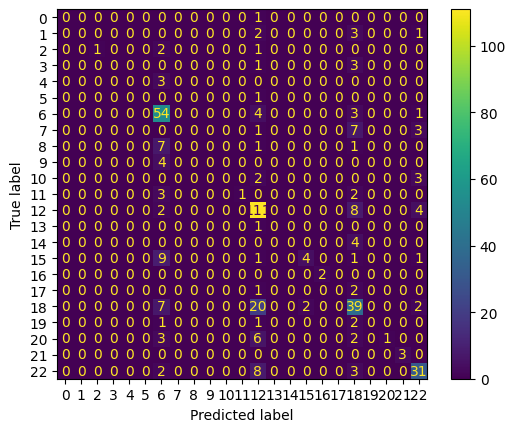

In [22]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [23]:
pipe.fit(X,y)
filename = './category_predictor.sav'
joblib.dump(pipe, filename)

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   1.6s
[Pipeline] ............ (step 2 of 2) Processing Logreg, total=  40.3s


['./category_predictor.sav']

In [24]:
filename = './Encoder.sav'
joblib.dump(Lencoder, filename)

['./Encoder.sav']